In [1]:
import random

from matplotlib import pyplot as plt
import numpy as np

from algorithms import solve_problem, fair_compromise_principle

 ### Вплив розмірності задачі (m,n) на точність алгоритмів
 #### Залежність точності алгоритмів від кількості машин та кількості робіт

Визначимо залежність точності алгоритмів від кількості машин $m$ та кількості робіт $n$.
Будемо змінювати $m$ з кроком 10 в межах [10,100] та $n$ з кроком 50 в межах [50,500].

In [2]:
num_iters = 10
m_step = 10
n_step = 50

m_values = [num * m_step for num in range(1, num_iters + 1)] # [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] m_step = 10
n_values = [num * n_step for num in range(1, num_iters + 1)] # [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] n_step = 50

greedy_F_us, relocation_F_us, exchange_F_us = [], [], []
greedy_makespans, relocation_makespans, exchange_makespans = [], [], []
greedy_to_relocation, greedy_to_exchange = [], []

for i, n in enumerate(n_values):
    u = [random.randint(1, 100) for _ in range(n)]
    p = [random.randint(1, 100) for _ in range(n)]
    
    (greedy_time, relocation_time, exchange_time,
     F_u_greedy, makespan_greedy,
     F_u_relocation, makespan_relocation,
     F_u_exchange, makespan_exchange) = solve_problem(m=m_values[i], n=n, u=u, p=p)
    
    greedy_F_us.append(F_u_greedy)
    relocation_F_us.append(F_u_relocation)
    exchange_F_us.append(F_u_exchange)
    
    greedy_makespans.append(makespan_greedy)
    relocation_makespans.append(makespan_relocation)
    exchange_makespans.append(makespan_exchange)
    
    greedy_to_relocation.append(fair_compromise_principle(
        F_u_relocation, makespan_relocation, F_u_greedy, makespan_greedy))
    greedy_to_exchange.append(fair_compromise_principle(
        F_u_exchange, makespan_exchange, F_u_greedy, makespan_greedy))


--- ЖАДІБНИЙ АЛГОРИТМ ---
Розклад:
М1: [[3, 73], [23, 89], [42, 55], [25, 20], [94, 56]]
М2: [[3, 70], [13, 38], [32, 47], [30, 29], [74, 56], [34, 5], [98, 3]]
М3: [[4, 74], [46, 87], [51, 47], [23, 11], [99, 30]]
М4: [[3, 55], [44, 85], [71, 71], [68, 23]]
М5: [[6, 80], [34, 62], [45, 52], [96, 62], [96, 5]]
М6: [[9, 83], [33, 54], [45, 52], [58, 36], [55, 12]]
М7: [[9, 80], [28, 45], [14, 18], [50, 45], [48, 21], [66, 11]]
М8: [[6, 43], [39, 71], [66, 68], [53, 21], [51, 4]]
М9: [[19, 100], [61, 83], [76, 51], [64, 7]]
М10: [[11, 53], [41, 62], [63, 55], [77, 27]]
Середній зважений час проходження робіт F_u: 69.39
Максимальний час закінчення робіт F_max: 284

--- АЛГОРИТМ ЛОКАЛЬНОГО ПОШУКУ З ПЕРЕМІЩЕННЯМ ---
Розклад:
М1: [[6, 80], [23, 89], [42, 55], [25, 20], [94, 56], [34, 5]]
М2: [[3, 70], [13, 38], [32, 47], [30, 29], [74, 56], [23, 11], [98, 3]]
М3: [[4, 74], [46, 87], [51, 47], [99, 30]]
М4: [[3, 55], [44, 85], [71, 71], [68, 23]]
М5: [[34, 62], [45, 52], [96, 62], [96, 5]]
М

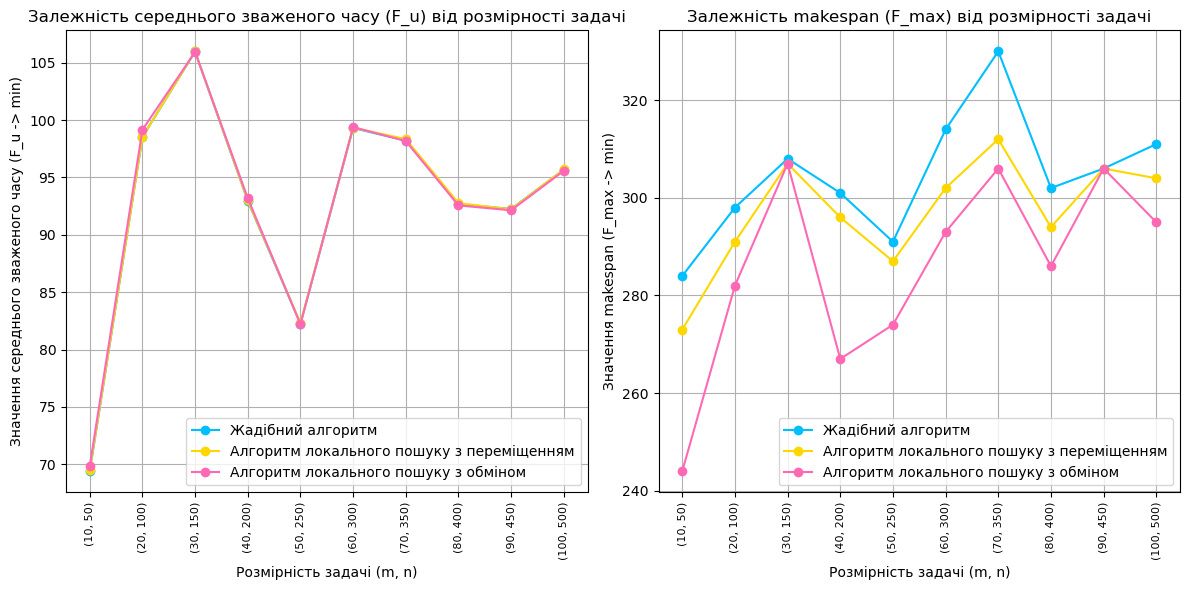

In [3]:
xtick_labels = [f"({m}, {n})" for m, n in zip(m_values, n_values)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_values, greedy_F_us, label="Жадібний алгоритм", color="deepskyblue", marker='o')
plt.plot(n_values, relocation_F_us, label="Алгоритм локального пошуку з переміщенням", color="gold", marker='o')
plt.plot(n_values, exchange_F_us, label="Алгоритм локального пошуку з обміном", color="hotpink", marker='o')
plt.xticks(n_values, xtick_labels, rotation=90, fontsize=8)
plt.xlabel("Розмірність задачі (m, n)")
plt.ylabel("Значення середнього зваженого часу (F_u -> min)")
plt.title("Залежність середнього зваженого часу (F_u) від розмірності задачі")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_values, greedy_makespans, label="Жадібний алгоритм", color="deepskyblue", marker='o')
plt.plot(n_values, relocation_makespans, label="Алгоритм локального пошуку з переміщенням", color="gold", marker='o')
plt.plot(n_values, exchange_makespans, label="Алгоритм локального пошуку з обміном", color="hotpink", marker='o')
plt.xticks(n_values, xtick_labels, rotation=90, fontsize=8)
plt.xlabel("Розмірність задачі (m, n)")
plt.ylabel("Значення makespan (F_max -> min)")
plt.title("Залежність makespan (F_max) від розмірності задачі")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

На графіках чітко видно покращення критерія makespan за допомогою алгоритмів локального пошуку, а для кращого аналізу середнього зваженого часу побудовано стовпчикову діаграму.

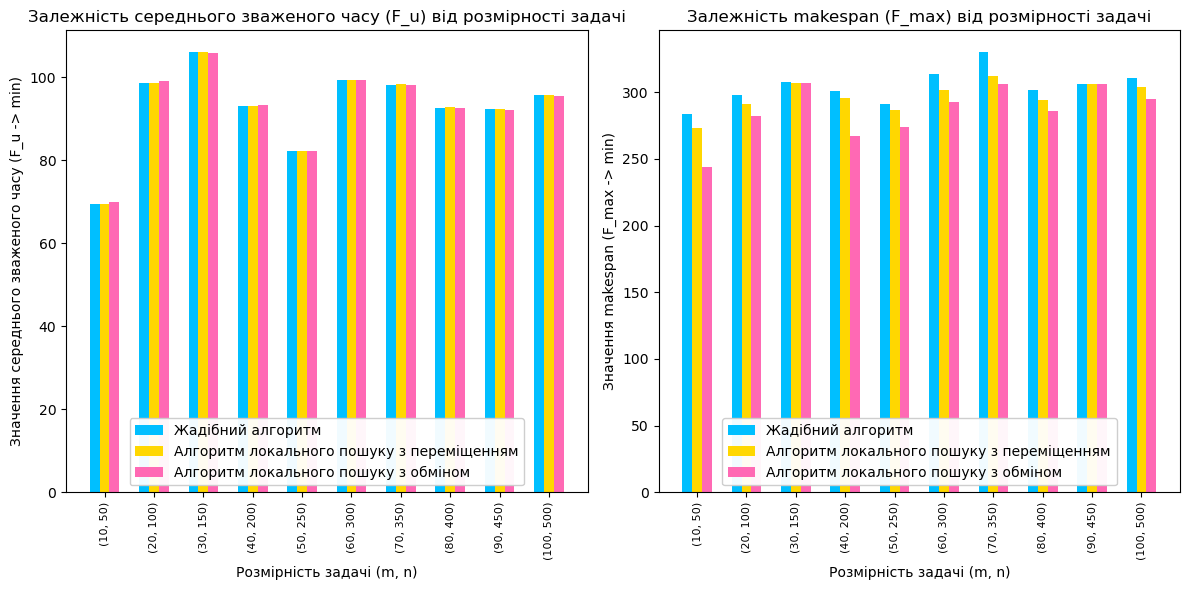

In [19]:
xtick_labels = [f"({m}, {n})" for m, n in zip(m_values, n_values)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
width = 2.0
x = np.arange(10, 101, 10)
plt.bar(x - width, greedy_F_us, width, color='deepskyblue', label='Жадібний алгоритм')
plt.bar(x, relocation_F_us, width, color='gold', label='Алгоритм локального пошуку з переміщенням')
plt.bar(x + width, exchange_F_us, width, color='hotpink', label='Алгоритм локального пошуку з обміном')

plt.xticks(x, xtick_labels, rotation=90, fontsize=8)
plt.xlabel("Розмірність задачі (m, n)")
plt.ylabel("Значення середнього зваженого часу (F_u -> min)")
plt.title("Залежність середнього зваженого часу (F_u) від розмірності задачі")
legend = plt.legend(loc='lower center')
legend.get_frame().set_alpha(0.95)

plt.subplot(1, 2, 2)
width = 2.0
x = np.arange(10, 101, 10)
plt.bar(x - width, greedy_makespans, width, color='deepskyblue', label='Жадібний алгоритм')
plt.bar(x, relocation_makespans, width, color='gold', label='Алгоритм локального пошуку з переміщенням')
plt.bar(x + width, exchange_makespans, width, color='hotpink', label='Алгоритм локального пошуку з обміном')

plt.xticks(x, xtick_labels, rotation=90, fontsize=8)
plt.xlabel("Розмірність задачі (m, n)")
plt.ylabel("Значення makespan (F_max -> min)")
plt.title("Залежність makespan (F_max) від розмірності задачі")
legend = plt.legend(loc='lower center')
legend.get_frame().set_alpha(0.95)

plt.tight_layout()
plt.show()

На графіках можна побачити, що значення середнього зваженого часу можуть трохи збільшуватись у порівнянні алгоритмів локального пошуку з жадібним, але на загальне покращення розв’язку (порівняння за принципом справедливого компромісу) в гіршу сторону це не впливає, адже задача двокритеріальна, і навіть при покращенні розв’язку один критерій може збільшитись (в даному випадку обидва критерії на мінімум).

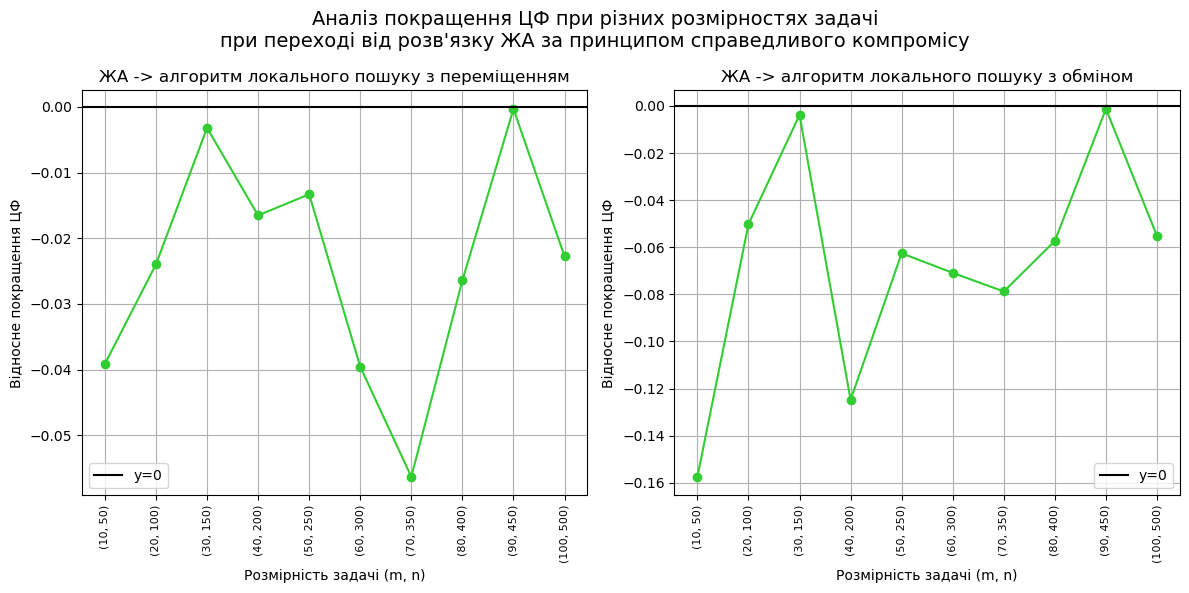

In [5]:
def plot_with_conditional_colors(ax, x_values, y_values):
    for i in range(len(x_values)):
        color = 'limegreen' if y_values[i] < 0 else 'red'
        if i > 0:
            ax.plot(x_values[i-1:i+1], y_values[i-1:i+1], color=color)
        ax.plot(x_values[i], y_values[i], marker='o', color=color)

xtick_labels = [f"({m}, {n})" for m, n in zip(m_values, n_values)]

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
plot_with_conditional_colors(ax1, m_values, greedy_to_relocation)
ax1.set_xticks(m_values)
ax1.set_xticklabels(xtick_labels, rotation=90, fontsize=8)
ax1.axhline(y=0, color='black', label="y=0")
ax1.set_xlabel("Розмірність задачі (m, n)")
ax1.set_ylabel("Відносне покращення ЦФ")
ax1.set_title("ЖА -> алгоритм локального пошуку з переміщенням")
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(1, 2, 2)
plot_with_conditional_colors(ax2, m_values, greedy_to_exchange)
ax2.set_xticks(m_values)
ax2.set_xticklabels(xtick_labels, rotation=90, fontsize=8)
ax2.axhline(y=0, color='black', label="y=0")
ax2.set_xlabel("Розмірність задачі (m, n)")
ax2.set_ylabel("Відносне покращення ЦФ")
ax2.set_title("ЖА -> алгоритм локального пошуку з обміном")
ax2.legend()
ax2.grid(True)

plt.suptitle("Аналіз покращення ЦФ при різних розмірностях задачі\n"
             "при переході від розв'язку ЖА за принципом справедливого компромісу", fontsize=14)

plt.tight_layout()
plt.show()

На графіках можна побачити, що значення відносного покращення цільових функцій, отриманих за допомогою порівняння розв’язку жадібного алгоритму та розв’язку алгоритмів локального пошуку, завжди знаходиться нижче нуля, тобто від’ємне. Це свідчить про те, що розроблені алгоритми локального пошуку практично завжди покращують результат.

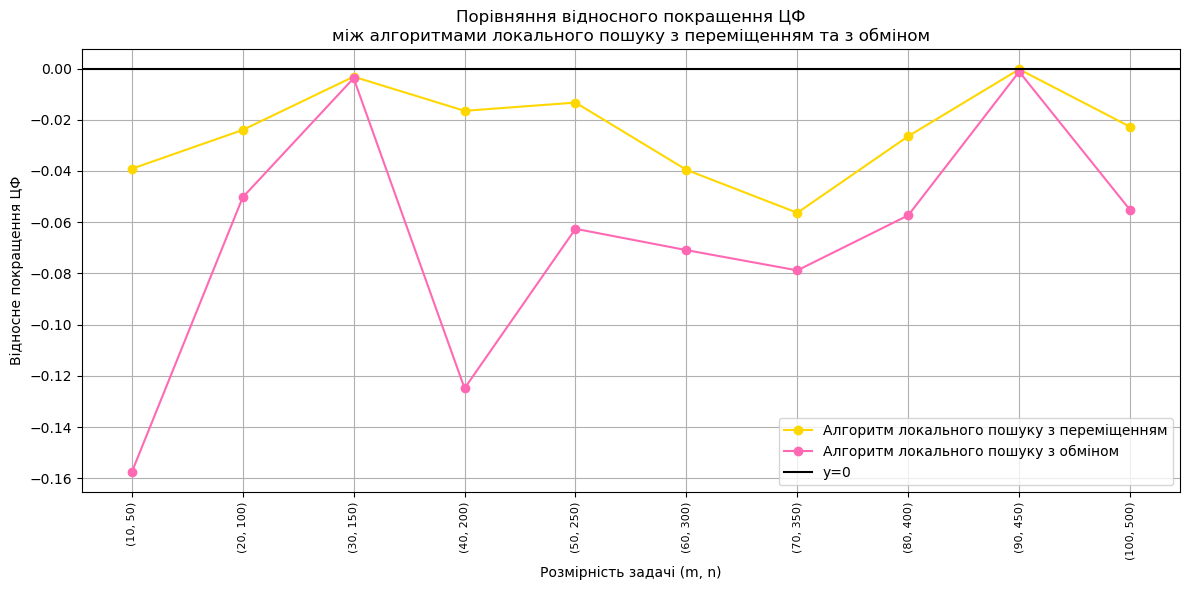

In [6]:
xtick_labels = [f"({m}, {n})" for m, n in zip(m_values, n_values)]

plt.figure(figsize=(12, 6))
plt.plot(m_values, greedy_to_relocation, marker='o', color="gold", label="Алгоритм локального пошуку з переміщенням")
plt.plot(m_values, greedy_to_exchange, marker='o', color="hotpink", label="Алгоритм локального пошуку з обміном")
plt.xticks(m_values, xtick_labels, rotation=90, fontsize=8)
plt.axhline(y=0, color='black', label="y=0")
plt.xlabel("Розмірність задачі (m, n)")
plt.ylabel("Відносне покращення ЦФ")
plt.title("Порівняння відносного покращення ЦФ\n"
          "між алгоритмами локального пошуку з переміщенням та з обміном")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

На графіку бачимо порівняння точності двох розроблених алгоритмів на різних розмірностях задачі. Можна бачити, що в середньому обидва алгоритми покращують результати, але алгоритм локального пошуку з обміном виривається вперед, адже має більше відносне покращення ЦФ.